# Importing Dependancies

In [ ]:
from textblob import TextBlob

In [ ]:
!pip install tweepy==3.10.0

In [ ]:
!pip install transformers

In [ ]:
import tweepy

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [ ]:
!pip install emoji==0.6.0

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
from tqdm.notebook import tqdm

In [ ]:
from scipy.special import softmax

In [ ]:
import seaborn as sns

# API connectivity and fetching tweets

In [ ]:
consumer_key = "vNG9YVGeLiqizavFoVembZVoN"
consumer_secret = "gOsFt5BOmizXRXtbmGKAFT1PvkbNpSWt2vLpvx3cnSkNtOleoA"
access_token = "1573549349631447040-QeSx7kQLRQAaeY7CANrSuoBRXqOlEo"
access_token_secret = "d5gGD79oiNu8Z0nHaIMG31qel6nXkfkm5A54L22Ia9O2h"

In [ ]:
# Establish the connection with API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
# given authorization to tweepy for accessing the twitter data

api = tweepy.API(auth) # geting API

In [ ]:
search_term = "Chatgpt"
no_of_tweets = 24

In [ ]:
tweets = tweepy.Cursor(api.search, q=search_term).items(no_of_tweets)

In [ ]:
tweets

# Preprocessing

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/chatgpt.csv')

In [ ]:
df

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,country,photo_url,city,country_code
0,1598014056790622225,2022-11-30 18:00:15+00:00,2,0,0,0,ChatGPT: Optimizing Language Models for Dialog...,NaN,NaN,NaN,NaN
1,1598014522098208769,2022-11-30 18:02:06+00:00,12179,889,1130,3252,"Try talking with ChatGPT, our new AI system wh...",NaN,NaN,NaN,NaN
2,1598014741527527435,2022-11-30 18:02:58+00:00,2,0,0,1,ChatGPT: Optimizing Language Models for Dialog...,NaN,https://pbs.twimg.com/media/Fi1J8HbWAAMv_yi.jpg,NaN,NaN
3,1598015493666766849,2022-11-30 18:05:58+00:00,561,8,25,66,"THRILLED to share that ChatGPT, our new model ...",NaN,https://pbs.twimg.com/media/Fi1Km3WUYAAfzHS.jpg,NaN,NaN
4,1598015509420994561,2022-11-30 18:06:01+00:00,1,0,0,0,"As of 2 minutes ago, @OpenAI released their ne...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
219289,1609338385864478720,2022-12-31 23:59:05+00:00,0,0,0,0,Other Software Projects Are Now Trying to Repl...,NaN,NaN,NaN,NaN
219290,1609338488293363712,2022-12-31 23:59:30+00:00,5,0,1,1,I asked #ChatGPT to write a #NYE Joke for SEOs...,NaN,NaN,NaN,NaN
219291,1609338538226757632,2022-12-31 23:59:42+00:00,7,0,0,0,chatgpt is being disassembled until it can onl...,NaN,NaN,NaN,NaN
219292,1609338573056245761,2022-12-31 23:59:50+00:00,3,0,1,0,2023 predictions by #chatGPT. Nothing really s...,NaN,https://pbs.twimg.com/media/FlWE3GKXoAAg-ac.jpg,NaN,NaN


In [ ]:
df = df[df['like_count'] >= 1000]

In [ ]:
df = df.head(50)

In [ ]:
# Extract the 'tweets' column and store it in a list
tweets = df['tweet'].tolist()

print(tweets)

['Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr', 'Just launched ChatGPT, our new AI system which is optimized for dialogue: https://t.co/ArX6m0FfLE.\\n\\nTry it out here: https://t.co/YM1gp5bA64', 'Just launched ChatGPT, our conversational AI system that listens, learns, and challenges: https://t.co/jMDbv8GC4a. \\n\\nHelp us make it better by trying it out here: https://t.co/Rn0DTHzk2J', "OK so @OpenAI's new #ChatGPT can basically just generate #AIart prompts. I asked a one-line question, and typed the answers verbatim straight into MidJourney and boom. Times are getting weird...🤯 https://t.co/sYwdscUxxf", 'Google is done.\\n\\nCompare the quality of these responses (ChatGPT) https://t.co/VGO7usvlIB', 'OpenAI released their ChatGPT. Damn, it is good. This might be GPT4. Starting a 🧵 with observations...\\n\\nFirst, it has a memory, something a lot of folks have been working on. https://t.co/j

In [ ]:
tweets

['Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr',
 'Just launched ChatGPT, our new AI system which is optimized for dialogue: https://t.co/ArX6m0FfLE.\\n\\nTry it out here: https://t.co/YM1gp5bA64',
 'Just launched ChatGPT, our conversational AI system that listens, learns, and challenges: https://t.co/jMDbv8GC4a. \\n\\nHelp us make it better by trying it out here: https://t.co/Rn0DTHzk2J',
 "OK so @OpenAI's new #ChatGPT can basically just generate #AIart prompts. I asked a one-line question, and typed the answers verbatim straight into MidJourney and boom. Times are getting weird...🤯 https://t.co/sYwdscUxxf",
 'Google is done.\\n\\nCompare the quality of these responses (ChatGPT) https://t.co/VGO7usvlIB',
 'OpenAI released their ChatGPT. Damn, it is good. This might be GPT4. Starting a 🧵 with observations...\\n\\nFirst, it has a memory, something a lot of folks have been working on. https://t

In [ ]:
df1 = pd.DataFrame(tweets)

In [ ]:
df1['my_id'] = range(1, len(df1) + 1)

In [ ]:
df1 = df1.rename(columns={0: 'tweetss'})

In [ ]:
print(df1)

                                              tweetss  my_id
0   Try talking with ChatGPT, our new AI system wh...      1
1   Just launched ChatGPT, our new AI system which...      2
2   Just launched ChatGPT, our conversational AI s...      3
3   OK so @OpenAI's new #ChatGPT can basically jus...      4
4   Google is done.\n\nCompare the quality of thes...      5
5   OpenAI released their ChatGPT. Damn, it is goo...      6
6   today we launched ChatGPT. try talking with it...      7
7   ChatGPT could be a good debugging companion; i...      8
8   OpenAI’s new ChatGPT appears to defeat Hofstad...      9
9   ChatGPT by @OpenAI does really well with codin...     10
10  OpenAI's new ChatGPT writes a Seinfeld scene i...     11
11  ChatGPT exploits a buffer overflow 😳 https://t...     12
12  Pretending is All You Need (to get ChatGPT to ...     13
13  OpenAI's new ChatGPT is mind-blowing. \n\nAski...     14
14  OpenAI's new ChatGPT explains the worst-case t...     15
15  This is actually so 

# Analysis ( Vader Analysis )

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
sentiments = []

for tweet in tweets:
    sentiment_scores = sia.polarity_scores(tweet)
    sentiments.append(sentiment_scores)

# Print the sentiment scores for each tweet
for i, sentiment in enumerate(sentiments):
    print(f"Tweet {i+1} Sentiment Scores: {sentiment}")

Tweet 1 Sentiment Scores: {'neg': 0.0, 'neu': 0.677, 'pos': 0.323, 'compound': 0.8225}
Tweet 2 Sentiment Scores: {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.5423}
Tweet 3 Sentiment Scores: {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.5719}
Tweet 4 Sentiment Scores: {'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.5904}
Tweet 5 Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Tweet 6 Sentiment Scores: {'neg': 0.088, 'neu': 0.817, 'pos': 0.095, 'compound': 0.0516}
Tweet 7 Sentiment Scores: {'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.128}
Tweet 8 Sentiment Scores: {'neg': 0.0, 'neu': 0.907, 'pos': 0.093, 'compound': 0.2382}
Tweet 9 Sentiment Scores: {'neg': 0.097, 'neu': 0.903, 'pos': 0.0, 'compound': -0.4588}
Tweet 10 Sentiment Scores: {'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'compound': 0.7645}
Tweet 11 Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Tweet 12 Sentiment Scores: {'neg': 0.375, 'neu': 0.62

In [ ]:
pos_count = 0
neg_count = 0
neu_count = 0

In [ ]:
for tweet in tweets:
    sentiment_scores = sia.polarity_scores(tweet)
    if sentiment_scores['compound'] > 0.1:
        pos_count += 1
    elif sentiment_scores['compound'] < -0.1:
        neg_count += 1
    else:
        neu_count += 1

# Print the counts of positive, negative, and neutral sentiments
print(f"Positive Count: {pos_count}")
print(f"Negative Count: {neg_count}")
print(f"Neutral Count: {neu_count}")

Positive Count: 26
Negative Count: 12
Neutral Count: 12


In [ ]:
posi = (pos_count/no_of_tweets) *100
nega = (neg_count/no_of_tweets) * 100
neut = (neu_count/no_of_tweets) * 100

In [ ]:
posi = format(posi, '.2f')
nega = format(nega, '.2f')
neut = format(neut, '.2f')

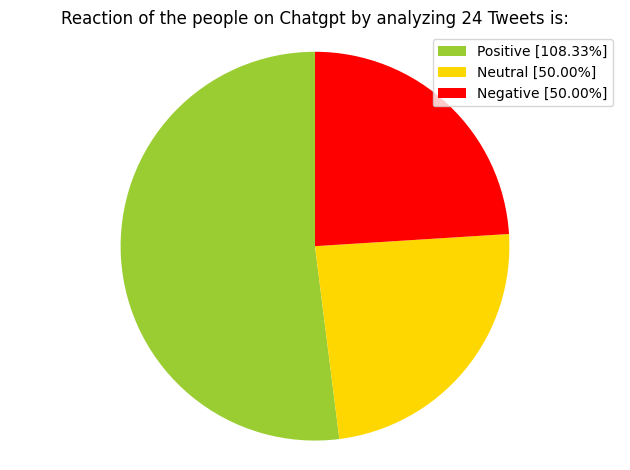

In [ ]:
# Print Pie Chart

labels = ['Positive ['+str(posi)+'%]',
          'Neutral ['+str(neut)+'%]',
          'Negative ['+str(nega)+'%]']

sizes = [pos_count, neu_count, neg_count]
colors = ['yellowgreen', 'gold', 'red']

patches, texts = plt.pie(sizes, colors = colors, startangle = 90)
plt.legend(patches, labels, loc = "best")
plt.title('Reaction of the people on '
          + search_term +' by analyzing '
          + str(no_of_tweets) +' Tweets is:')
plt.axis('equal')
plt.tight_layout()
plt.show()

#Analysis ( Vader + RoBERTa)

In [ ]:
def polarity_scores_roberta(exp):
    encoded_text = tokenizer(exp, return_tensors="pt")
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_dict = {
        "roberta_neg" : scores [0],
        "roberta_neu" : scores[1],
        "roberta_pos" : scores[2]
    }
    return (scores_dict)

In [ ]:
res={}
for i, row in tqdm(df1.iterrows(), total=len(df1)):
    try:
        text= row["tweetss"]
        myid= row["my_id"]
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f"Broke for id {myid}")

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
df_final = pd.DataFrame(res).T
df_final= df_final.reset_index().rename(columns={"index": "my_id"})
df_final= df_final.merge(df1, how="left")
df_final.head()

,my_id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,tweetss
0,1,0.0,0.677,0.323,0.8225,0.005323,0.228202,0.766476,"Try talking with ChatGPT, our new AI system wh..."
1,2,0.0,0.769,0.231,0.5423,0.004428,0.305897,0.689675,"Just launched ChatGPT, our new AI system which..."
2,3,0.0,0.787,0.213,0.5719,0.003495,0.147190,0.849315,"Just launched ChatGPT, our conversational AI s..."
3,4,0.0,0.848,0.152,0.5904,0.349065,0.541097,0.109838,OK so @OpenAI's new #ChatGPT can basically jus...
4,5,0.0,1.000,0.000,0.0000,0.170032,0.722219,0.107749,Google is done.\n\nCompare the quality of thes...


NEW

In [ ]:
df2 = df1
df2

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load the DistilBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")
model = AutoModelForSequenceClassification.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")


In [ ]:

# Create a function to perform sentiment analysis on a single tweet
def predict_sentiment(tweet):

  # Encode the tweet using the DistilBERT tokenizer
  encoded_tweet = tokenizer(tweet, return_tensors="pt")

  # Perform sentiment analysis on the encoded tweet using the DistilBERT model
  outputs = model(**encoded_tweet)

  # Get the predicted sentiment scores
  sentiment_scores = outputs.logits.softmax(-1)

  # Get the predicted sentiment label
  predicted_sentiment = sentiment_scores.argmax(-1).item()

  # Convert the predicted sentiment label to a string
  if predicted_sentiment == 0:
    return "positive"
  elif predicted_sentiment == 1:
    return "negative"
  else:
    return "neutral"

# Apply the sentiment analysis function to the `df['tweetss]` column
df2["sentiment"] = df2["tweetss"].apply(predict_sentiment)

In [ ]:
df2.head()

,tweetss,my_id,sentiment
0,"Try talking with ChatGPT, our new AI system wh...",1,positive
1,"Just launched ChatGPT, our new AI system which...",2,positive
2,"Just launched ChatGPT, our conversational AI s...",3,positive
3,OK so @OpenAI's new #ChatGPT can basically jus...,4,neutral
4,Google is done.\n\nCompare the quality of thes...,5,positive
